<font color="red" size="6"><b>Programmation dynamique</b></font>

<font color="blue" size="5"><b>I Fibonacci récursif naïf</b></font>

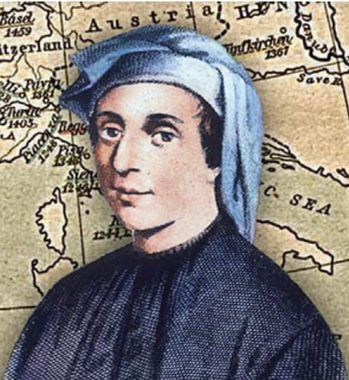

In [ ]:
# 1 1 2 3 5 8 13 21 39 ...

# codez la fonction FiboRec (avec une fonction récursive)
def FiboRec(n) :
    if n <=2 : return 1
    return FiboRec(n-1)+FiboRec(n-2)

In [ ]:
for i in range(1,40) : print(i,FiboRec(i))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986


Que constatez vous ???

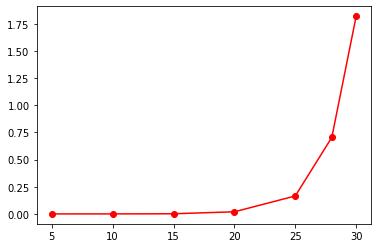

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt


abcisse = [5,10,15,20,25,28,30]
ordonnee=[0 for _ in range(len(abcisse))]
for i in range(len(abcisse)) :
    ordonnee[i] = timeit("FiboRec(abcisse[i])", number=10, globals=globals())

# Graphique pour le tri sélection en rouge
plt.plot(abcisse, ordonnee, "ro-") # en rouge


plt.show()
plt.close()

hmmm.... pas fameux !!!
Mais il fallait s'y attendre, la complexité est exponentielle.

<font color="blue" size="5"><b>II Fibonacci récursif + mémoïsation</b></font>

In [1]:
# Codez la version avec mémoïsation

def Fibo(n,memo) :
    if n in memo.keys() : return memo[n]
    #if n<=2 : return 1
    memo[n] = Fibo(n-1,memo)+Fibo(n-2,memo)
    #memo[n]=1+1
    return memo[n]
def Fibomem(n):
    memo={1:1,2:1}
    return Fibo(n,memo)

In [2]:
for i in range(1,40) : print(i,Fibo(i,{1:1,2:1}))

1 1
2 1
3 2
4 3
5 5
6 8
7 13
8 21
9 34
10 55
11 89
12 144
13 233
14 377
15 610
16 987
17 1597
18 2584
19 4181
20 6765
21 10946
22 17711
23 28657
24 46368
25 75025
26 121393
27 196418
28 317811
29 514229
30 832040
31 1346269
32 2178309
33 3524578
34 5702887
35 9227465
36 14930352
37 24157817
38 39088169
39 63245986


D'emblée... c'est mieux non ?

Voyons le graphique :

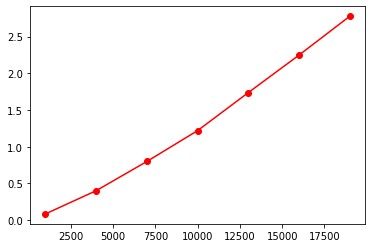

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

abcisse = [i for i in range(1000,22000,3000)]
ordonnee=[0 for _ in range(len(abcisse))]
for i in range(len(abcisse)) :
    ordonnee[i] = timeit(stmt="Fibomem(abcisse[i])", number=100, globals=globals())

# Graphique 
plt.plot(abcisse, ordonnee, "ro-") # en rouge


plt.show()
plt.close()

In [ ]:
# Variante :

def Fibomem2(n,memo=None) :
    if memo == None : memo={1:1,2:1}
    if n in memo.keys() : return memo[n]
    memo[n] = Fibomem2(n-1,memo)+Fibomem2(n-2,memo)
    return memo[n]
Fibomem2(100)

354224848179261915075

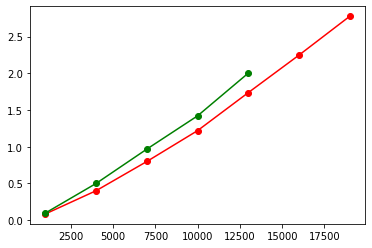

In [ ]:
from timeit import timeit
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

abcisse2 = [i for i in range(1000,15000,3000)]
ordonnee2=[0 for _ in range(len(abcisse2))]
for i in range(len(abcisse2)) :
    ordonnee2[i] = timeit(stmt="Fibomem2(abcisse2[i])", number=100, globals=globals())

# Graphique 
plt.plot(abcisse, ordonnee, "ro-") # en rouge
plt.plot(abcisse2, ordonnee2, "go-") # en vert


plt.show()
plt.close()

## Et avec une boucle for sans mémoire ?

In [4]:
%%time

def fibo1(n: int) -> int:
    fi, fip1 = 0, 1
    for i in range(n):
        fi, fip1 = fip1, fi + fip1
    return fi

for n in range(100, 110):
    print(f"fibo1({n}) = {fibo1(n)}")

fibo1(100) = 354224848179261915075
fibo1(101) = 573147844013817084101
fibo1(102) = 927372692193078999176
fibo1(103) = 1500520536206896083277
fibo1(104) = 2427893228399975082453
fibo1(105) = 3928413764606871165730
fibo1(106) = 6356306993006846248183
fibo1(107) = 10284720757613717413913
fibo1(108) = 16641027750620563662096
fibo1(109) = 26925748508234281076009
CPU times: user 609 µs, sys: 0 ns, total: 609 µs
Wall time: 511 µs


In [8]:
for n in [10, 100, 1000, 10000]:
    print(f"Pour n = {n}, fibo1 a pris ce temps : ", end='', flush=True)
    %timeit fibo1(n)

Pour n = 10, fibo1 a pris ce temps : The slowest run took 6.19 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 691 ns per loop
Pour n = 100, fibo1 a pris ce temps : The slowest run took 24.96 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 5.22 µs per loop
Pour n = 1000, fibo1 a pris ce temps : 10000 loops, best of 5: 72.7 µs per loop
Pour n = 10000, fibo1 a pris ce temps : 1000 loops, best of 5: 1.9 ms per loop


## Et avec une simple boucle while, sans `for` ?

In [9]:
%%time

def fibo2(n: int) -> int:
    fi  : int = 0
    fip1: int = 1
    fip2: int = 2
    i   : int = 1
    while i <= n:
        fip2 = fi + fip2
        i += 1
        fi = fip1
        fip1 = fip2
    return fi

for n in range(100, 110):
    print(f"fibo2({n}) = {fibo2(n)}")

fibo2(100) = 573147844013817084101
fibo2(101) = 927372692193078999176
fibo2(102) = 1500520536206896083277
fibo2(103) = 2427893228399975082453
fibo2(104) = 3928413764606871165730
fibo2(105) = 6356306993006846248183
fibo2(106) = 10284720757613717413913
fibo2(107) = 16641027750620563662096
fibo2(108) = 26925748508234281076009
fibo2(109) = 43566776258854844738105
CPU times: user 0 ns, sys: 744 µs, total: 744 µs
Wall time: 522 µs


In [10]:
for n in [10, 100, 1000, 10000]:
    print(f"Pour n = {n}, fibo2 a pris ce temps :", end='', flush=True)
    %timeit fibo2(n)

Pour n = 10, fibo2 a pris ce temps :The slowest run took 21.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 850 ns per loop
Pour n = 100, fibo2 a pris ce temps :100000 loops, best of 5: 8.41 µs per loop
Pour n = 1000, fibo2 a pris ce temps :10000 loops, best of 5: 106 µs per loop
Pour n = 10000, fibo2 a pris ce temps :100 loops, best of 5: 2.21 ms per loop


## Et avec une fonction Cython ?
On va tester de compiler la fonction en C avec [Cython](https://www.cython.org/) pour voir si on obtient des performances "vraiment linéaires" :

In [11]:
%load_ext cython

In [15]:
%%cython

def fibo3(unsigned long long n):
    cdef unsigned long long fi = 0
    cdef unsigned long long fip1 = 1
    cdef unsigned long long fip2 = 2
    cdef unsigned long long i = 1
    while i <= n:
        fip2 = fi + fip2
        i += 1
        fi = fip1
        fip1 = fip2
    return fi

In [16]:
%%time
for n in range(100, 110):
    print(f"fibo3({n}) = {fibo3(n)}")

fibo3(100) = 1298777728820984005
fibo3(101) = 5035488507601418376
fibo3(102) = 6334266236422402381
fibo3(103) = 11369754744023820757
fibo3(104) = 17704020980446223138
fibo3(105) = 10627031650760492279
fibo3(106) = 9884308557497163801
fibo3(107) = 2064596134548104464
fibo3(108) = 11948904692045268265
fibo3(109) = 14013500826593372729
CPU times: user 1.2 ms, sys: 0 ns, total: 1.2 ms
Wall time: 3 ms


In [17]:
for n in [10, 100, 1000, 10000]:
    print(f"Pour n = {n}, fibo3 a pris ce temps :", end='', flush=True)
    %timeit fibo3(n)

Pour n = 10, fibo3 a pris ce temps :The slowest run took 44.76 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 66.6 ns per loop
Pour n = 100, fibo3 a pris ce temps :The slowest run took 10.30 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 5: 160 ns per loop
Pour n = 1000, fibo3 a pris ce temps :The slowest run took 4.11 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 842 ns per loop
Pour n = 10000, fibo3 a pris ce temps :100000 loops, best of 5: 7.66 µs per loop


Bien sûr, on peut encore écrire du code Cython plus efficace, cf [la doc](https://cython.readthedocs.io/en/latest/src/tutorial/cython_tutorial.html).

Et avec Cython on utilise les types C  donc les entiers bornés, d'où mon utilisation de `unsigned long long`, le type natif d'entirs C le plus grand possible.

-- Partie rédigée par [Lilian Besson](https://besson.link/) ([@Naereen](https://GitHub.com/Naereen))

## Graphiques avec plein de comparaison

In [41]:
globals().update({'ok': 'ok'})

Tailles = [   10    22    47   100   216   465  1000  2155  4642 10000]
Estimation des temps pour Linéaire (for) (<function fibo1 at 0x7f07953f8a70>)...
Estimation des temps pour Linéaire (while) (<function fibo2 at 0x7f0795390320>)...
Estimation des temps pour Linéaire (Cython) (<built-in function fibo3>)...


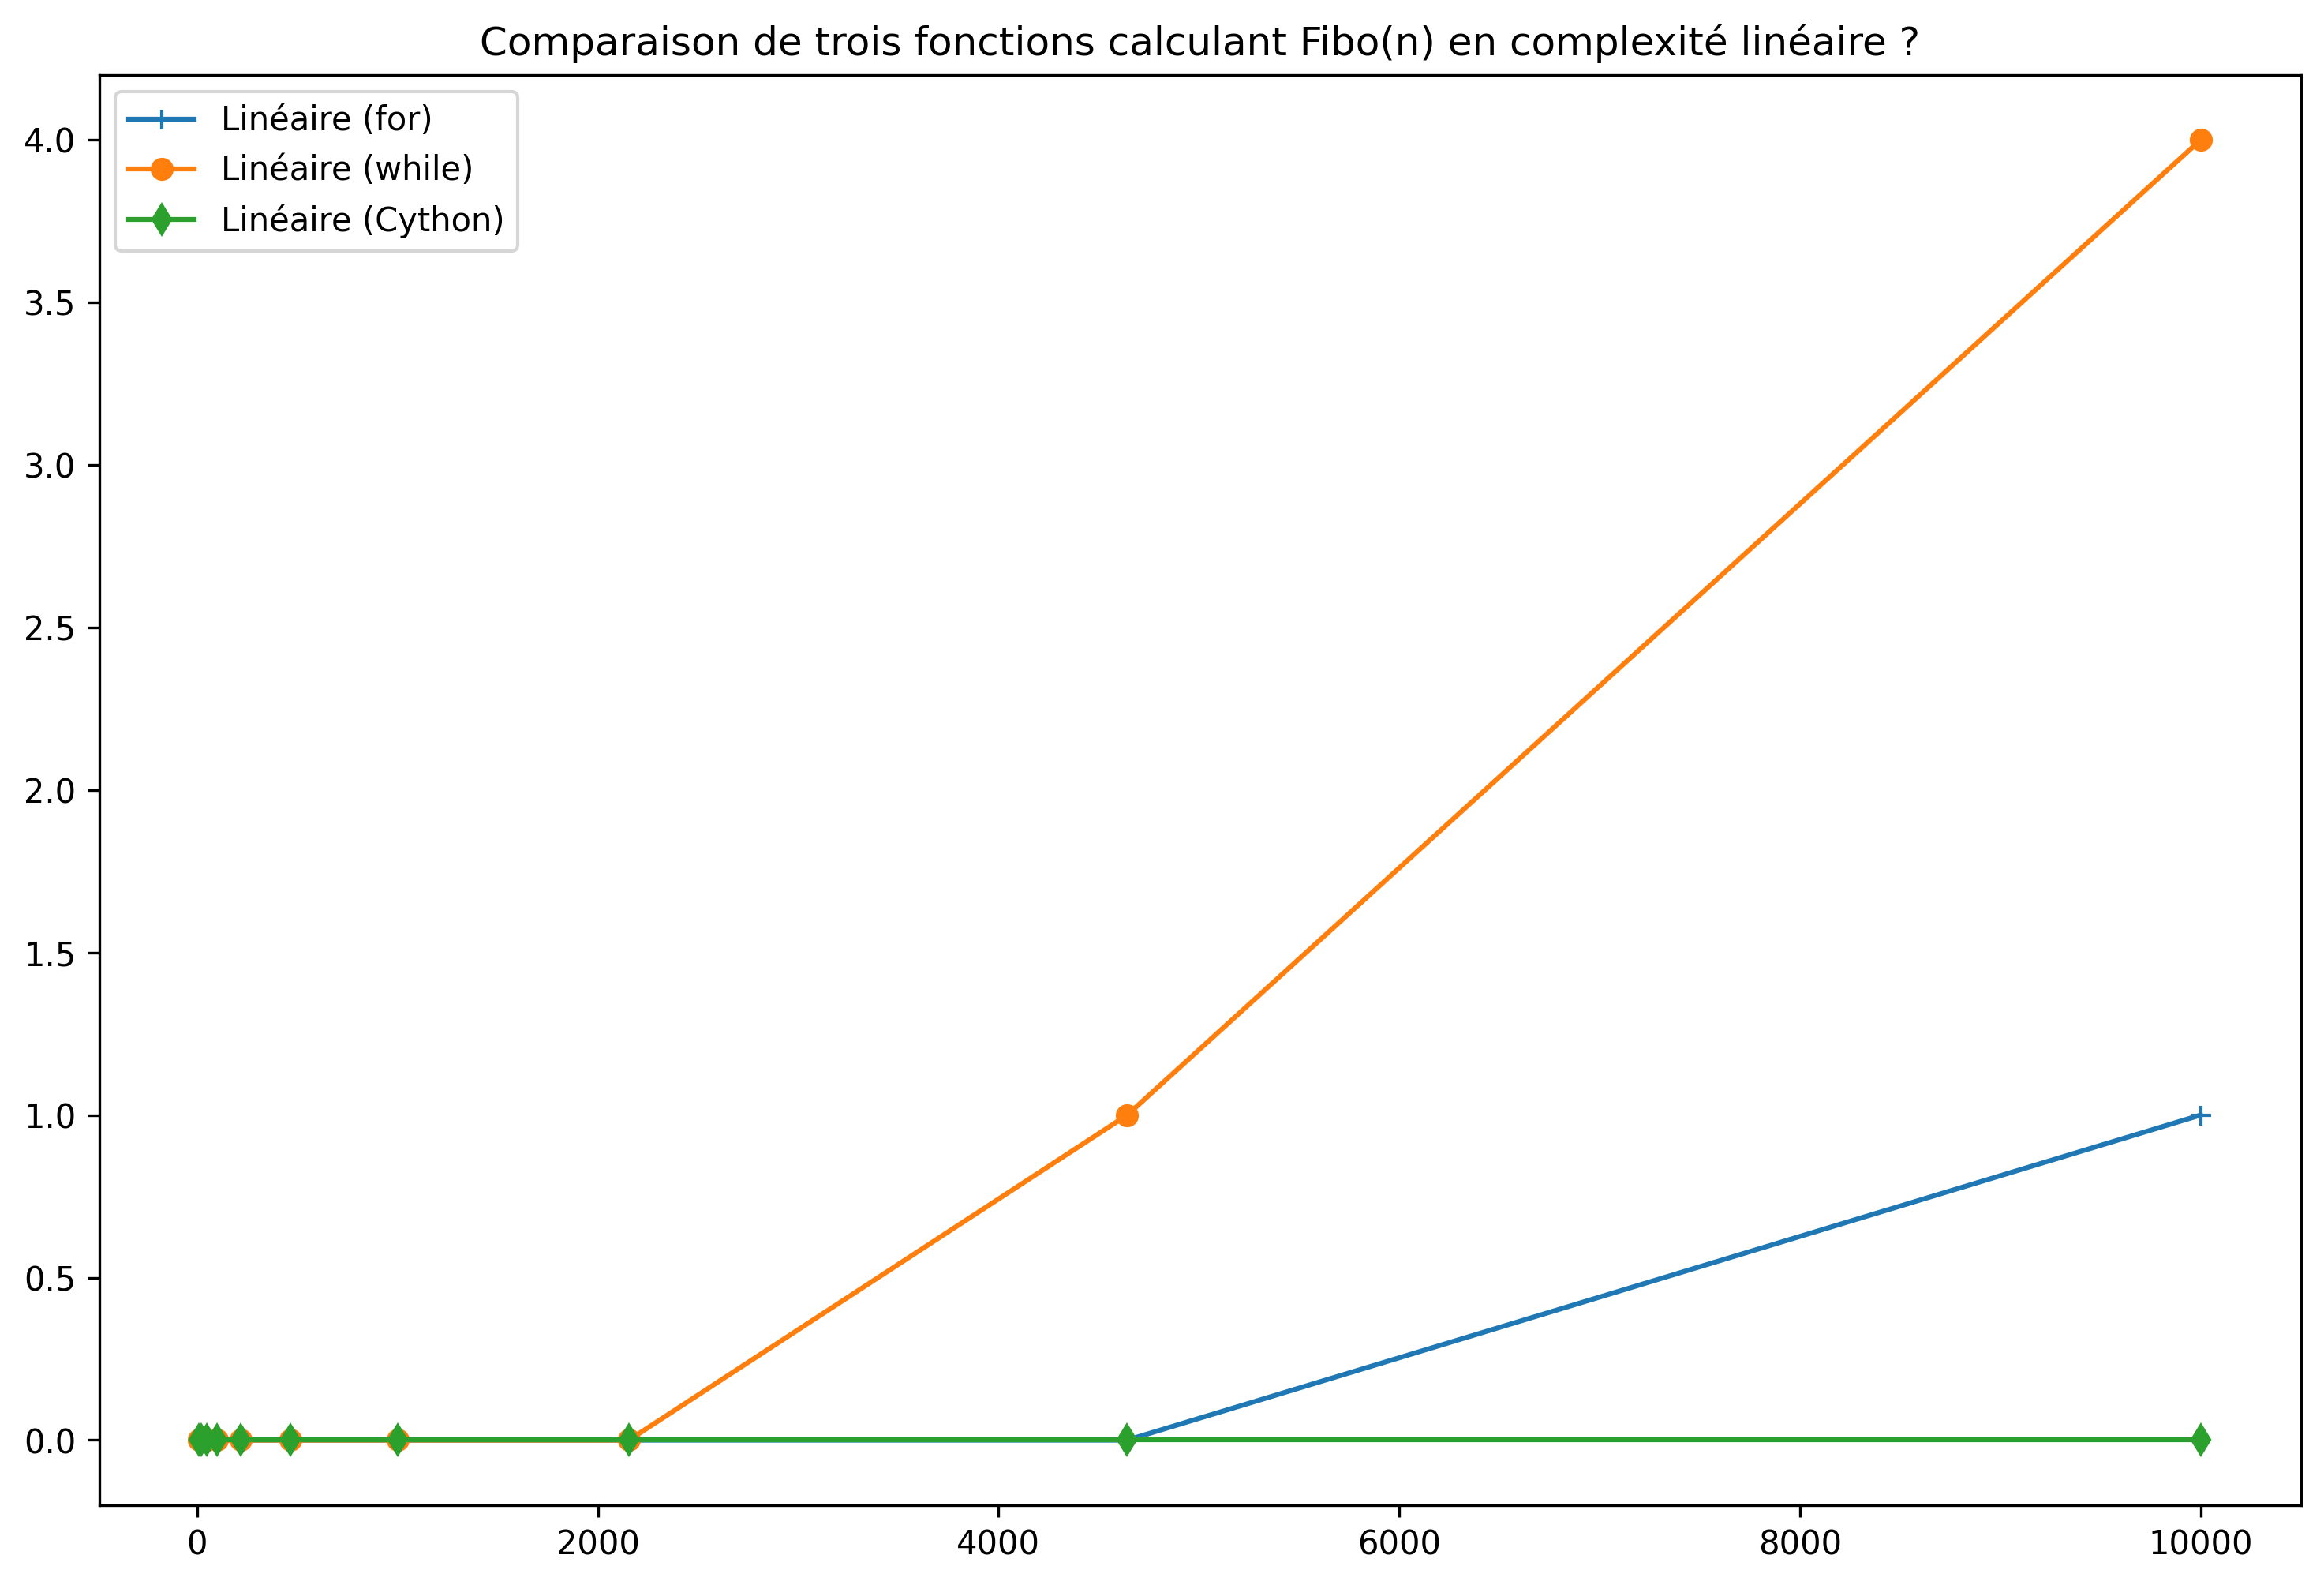

In [45]:
from timeit import timeit
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.setrecursionlimit(90000)

exp_min, exp_max, nb_tailles = 1, 4, 10
number_timeit = 1000

tailles = np.array(np.ceil(np.logspace(exp_min, exp_max, nb_tailles)), dtype=int)
print(f"Tailles = {tailles}")

fonctions = {
    "Linéaire (for)": fibo1,
    "Linéaire (while)": fibo2,
    "Linéaire (Cython)": fibo3,
}
temps = {}

for nom, fonction in fonctions.items():
    temps[nom] = np.zeros_like(tailles)
    print(f"Estimation des temps pour {nom} ({fonction})...")
    for i, taille in enumerate(tailles):
        temps[nom][i] = timeit(stmt="fonctions[nom](taille)",
                               number=number_timeit,
                               globals={'fonction': fonction, 'taille': taille, 'fonctions': fonctions, 'nom': nom}
                               )
        #print(f"Calling %timeit {fonction}({taille}): ")
        #%timeit fonction(taille)

# Graphique
plt.figure(figsize=(12, 8), dpi=300)
plt.title("Comparaison de trois fonctions calculant Fibo(n) en complexité linéaire ?")

markers = ['+', 'o', 'd']
for i, (nom, fonction) in enumerate(fonctions.items()):
    plt.plot(tailles, temps[nom], label=nom, marker=markers[i % len(fonctions)])

plt.legend()
plt.show()


<font color="blue" size="5"><b>III Fibonacci : approche de bas en haut</b></font>

In [19]:
# Approche de bas en haut


def FiboMonte(n) :
    fib=[0 for _ in range(n+1)]
    fib[1]=fib[2]=1
    for i in range(3,n+1) :
        fib[i] =fib[i-1]+fib[i-2]

    return fib[n]

In [20]:
from timeit import timeit
import matplotlib.pyplot as plt
abcisse = [i for i in range(1000,22000,3000)]
ordonneeMonte=[0 for _ in range(len(abcisse))]

ordonneeMonte=[0 for _ in range(len(abcisse))]
for i in range(len(abcisse)) :
    ordonneeMonte[i] = timeit(stmt="FiboMonte(abcisse[i])", number=50, globals=globals())

# Graphique 
plt.plot(abcisse, ordonnee, "ro-") # en rouge
plt.plot(abcisse, ordonneeMonte, "go-") # en vert


plt.show()
plt.close()

NameError: ignored



---

**Auteur** Jean-Louis Thirot - Lycée Bertrand d'Argentré - Vitré (35)

Publié sous licence CC BY-NC-SA


---

